In [1]:
import json 
import numpy as np
import re
import nltk 
import random


In [2]:
data_file = open(r"C:\Users\user\Desktop\intents.json").read()
intents = json.loads(data_file)

In [3]:
intents


{'intents': [{'tag': 'greetings',
   'patterns': ['Hello, how can I assist you?',
    'Hi, how may I help?',
    'Hey there, need any assistance?',
    'Good morning, how can I be of service?',
    'Good afternoon, what can I help with?'],
   'responses': ['Hello! How can I help you?',
    'Hi there! What do you need assistance with?',
    "Hey! I'm here to help you explore your options.",
    'How may I assist you today?',
    'What can I do for you?'],
   'context': ['']},
  {'tag': 'cse',
   'patterns': ['Can you tell me about Computer Science?',
    'What is the importance of Computer Science?',
    'Give me details about Computer Science.',
    'Tell me more about Computer Science.',
    'What should I know about Computer Science?'],
   'responses': ['Computer Science is essential for understanding technology today.',
    "It's a field that leads to many job opportunities in various sectors.",
    'A degree in Computer Science prepares you for many exciting roles.',
    'Computer 

In [4]:
tags=[]
patterns=[]
responses=[]



In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#stem=nltk.stem.PorterStemmer()
lem = WordNetLemmatizer()
stem=PorterStemmer()
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
for i in intents.values():
    for j in i:
        print(j)
        
    
    

{'tag': 'greetings', 'patterns': ['Hello, how can I assist you?', 'Hi, how may I help?', 'Hey there, need any assistance?', 'Good morning, how can I be of service?', 'Good afternoon, what can I help with?'], 'responses': ['Hello! How can I help you?', 'Hi there! What do you need assistance with?', "Hey! I'm here to help you explore your options.", 'How may I assist you today?', 'What can I do for you?'], 'context': ['']}
{'tag': 'cse', 'patterns': ['Can you tell me about Computer Science?', 'What is the importance of Computer Science?', 'Give me details about Computer Science.', 'Tell me more about Computer Science.', 'What should I know about Computer Science?'], 'responses': ['Computer Science is essential for understanding technology today.', "It's a field that leads to many job opportunities in various sectors.", 'A degree in Computer Science prepares you for many exciting roles.', 'Computer Science helps you develop skills in problem-solving and programming.', "It's a rapidly grow

In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors 


sentences = [['the', 'cat', 'sat', 'on', 'the', 'mat']
            ]
  


model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
vc=model.wv["sat"]
print(vc)

[-8.2426779e-03  9.2993546e-03 -1.9766092e-04 -1.9672764e-03
  4.6036304e-03 -4.0953159e-03  2.7431143e-03  6.9399667e-03
  6.0654259e-03 -7.5107943e-03  9.3823504e-03  4.6718083e-03
  3.9661205e-03 -6.2435055e-03  8.4599797e-03 -2.1501649e-03
  8.8251876e-03 -5.3620026e-03 -8.1294188e-03  6.8245591e-03
  1.6711927e-03 -2.1985089e-03  9.5136007e-03  9.4938548e-03
 -9.7740470e-03  2.5052286e-03  6.1566923e-03  3.8724565e-03
  2.0227872e-03  4.3050171e-04  6.7363144e-04 -3.8206363e-03
 -7.1402504e-03 -2.0888723e-03  3.9238976e-03  8.8186832e-03
  9.2591504e-03 -5.9759365e-03 -9.4026709e-03  9.7643770e-03
  3.4297847e-03  5.1661171e-03  6.2823449e-03 -2.8042626e-03
  7.3227035e-03  2.8302716e-03  2.8710044e-03 -2.3803699e-03
 -3.1282497e-03 -2.3701417e-03  4.2764368e-03  7.6057913e-05
 -9.5842788e-03 -9.6655441e-03 -6.1481940e-03 -1.2856961e-04
  1.9974159e-03  9.4319675e-03  5.5843508e-03 -4.2906962e-03
  2.7831673e-04  4.9643586e-03  7.6983096e-03 -1.1442233e-03
  4.3234206e-03 -5.81437

In [10]:
for i in intents.values():
    for j in i:
        a=j["tag"].lower()
        b=[word.lower() for word in j["patterns"]]
        b = [re.sub(r'[^A-Za-z0-9\s]', '',i) for i in b]
        c=[word.lower() for word in j["responses"]] 
        c = [re.sub(r'[^A-Za-z0-9\s]', '',i) for i in c]
        print(a)
        print(b)
        print(c)
        ta=nltk.word_tokenize(a)
        tb=[nltk.word_tokenize(word) for word in b] 
        tc=[nltk.word_tokenize(word) for word in c] 
        print("after tag tokening:    ",ta)
        print("after pattern tokening:    ",tb)
        print("after resonse tokening:    ",tc)

        for i in ta:
            sa=lem.lemmatize(i)
            tags.append(sa)
        for i in tb:
            for j in i:
                sb=lem.lemmatize(j)
                patterns.append(sb)
                
        for i in tc:
            for j in i:
                sc=lem.lemmatize(j)
                responses.append(sc)
                
        print("after stemming:    ",sa)
        print("after stemming  BBb:    ",sb)
        print("after stemming CCCC:    ",sc)
          
              
        
        
    




greetings
['hello how can i assist you', 'hi how may i help', 'hey there need any assistance', 'good morning how can i be of service', 'good afternoon what can i help with']
['hello how can i help you', 'hi there what do you need assistance with', 'hey im here to help you explore your options', 'how may i assist you today', 'what can i do for you']
after tag tokening:     ['greetings']
after pattern tokening:     [['hello', 'how', 'can', 'i', 'assist', 'you'], ['hi', 'how', 'may', 'i', 'help'], ['hey', 'there', 'need', 'any', 'assistance'], ['good', 'morning', 'how', 'can', 'i', 'be', 'of', 'service'], ['good', 'afternoon', 'what', 'can', 'i', 'help', 'with']]
after resonse tokening:     [['hello', 'how', 'can', 'i', 'help', 'you'], ['hi', 'there', 'what', 'do', 'you', 'need', 'assistance', 'with'], ['hey', 'im', 'here', 'to', 'help', 'you', 'explore', 'your', 'options'], ['how', 'may', 'i', 'assist', 'you', 'today'], ['what', 'can', 'i', 'do', 'for', 'you']]
after stemming:     greeti

In [11]:
for i in intents.values():
    for j in i:
        a=j["tag"].lower()       
        ta=nltk.word_tokenize(a)
print("after tokening:    ",ta)

after tokening:     ['cse']


In [12]:
print(tags)

['greeting', 'cse']


In [13]:
print(patterns)

['hello', 'how', 'can', 'i', 'assist', 'you', 'hi', 'how', 'may', 'i', 'help', 'hey', 'there', 'need', 'any', 'assistance', 'good', 'morning', 'how', 'can', 'i', 'be', 'of', 'service', 'good', 'afternoon', 'what', 'can', 'i', 'help', 'with', 'can', 'you', 'tell', 'me', 'about', 'computer', 'science', 'what', 'is', 'the', 'importance', 'of', 'computer', 'science', 'give', 'me', 'detail', 'about', 'computer', 'science', 'tell', 'me', 'more', 'about', 'computer', 'science', 'what', 'should', 'i', 'know', 'about', 'computer', 'science']


In [14]:
print(responses)


['hello', 'how', 'can', 'i', 'help', 'you', 'hi', 'there', 'what', 'do', 'you', 'need', 'assistance', 'with', 'hey', 'im', 'here', 'to', 'help', 'you', 'explore', 'your', 'option', 'how', 'may', 'i', 'assist', 'you', 'today', 'what', 'can', 'i', 'do', 'for', 'you', 'computer', 'science', 'is', 'essential', 'for', 'understanding', 'technology', 'today', 'it', 'a', 'field', 'that', 'lead', 'to', 'many', 'job', 'opportunity', 'in', 'various', 'sector', 'a', 'degree', 'in', 'computer', 'science', 'prepares', 'you', 'for', 'many', 'exciting', 'role', 'computer', 'science', 'help', 'you', 'develop', 'skill', 'in', 'problemsolving', 'and', 'programming', 'it', 'a', 'rapidly', 'growing', 'field', 'with', 'diverse', 'career', 'path']


In [15]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors 


sentences = [patterns]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
patvec=[]



for i in sentences:
    for j in i:
        patvec.append(model.wv[i])
print(patvec) 




sentences = [responses]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
resvec=[]



for i in sentences:
    for j in i:
        resvec.append(model.wv[i])
print(resvec)  


[array([[-1.5110135e-03, -4.0345038e-03, -4.3988526e-03, ...,
        -3.4136428e-03, -2.9241275e-03,  5.6689298e-03],
       [ 8.1382915e-03, -4.4287825e-03, -1.0469144e-03, ...,
        -5.7458128e-03, -1.6644081e-03,  5.5979989e-03],
       [-7.1439920e-03,  1.2749798e-03, -7.1471054e-03, ...,
         4.7873114e-03,  7.8071014e-04,  3.0289083e-03],
       ...,
       [-8.2428092e-03,  9.3363700e-03, -1.6638455e-04, ...,
        -7.4694324e-03, -2.5225696e-03, -5.5365707e-03],
       [ 9.1505026e-05,  3.0839234e-03, -6.8049086e-03, ...,
         5.0447125e-04,  8.2076890e-03, -7.0223520e-03],
       [-8.6214924e-03,  3.6745891e-03,  5.1976247e-03, ...,
        -2.4074381e-03, -9.5150489e-03,  4.5067570e-03]], dtype=float32), array([[-1.5110135e-03, -4.0345038e-03, -4.3988526e-03, ...,
        -3.4136428e-03, -2.9241275e-03,  5.6689298e-03],
       [ 8.1382915e-03, -4.4287825e-03, -1.0469144e-03, ...,
        -5.7458128e-03, -1.6644081e-03,  5.5979989e-03],
       [-7.1439920e-03,  1

In [16]:
structured_data={}

In [17]:

for i in intents.values():
    for j in i:
        a=j["tag"].lower()
        b=[word.lower() for word in j["patterns"]]
        b = [re.sub(r'[^A-Za-z0-9\s]', '',i) for i in b]
        c=[word.lower() for word in j["responses"]] 
        c = [re.sub(r'[^A-Za-z0-9\s]', '',i) for i in c]
        print(a)
        print(b)
        print(c)
        ta=nltk.word_tokenize(a)
        tb=[nltk.word_tokenize(word) for word in b] 
        tc=[nltk.word_tokenize(word) for word in c] 
        print("after tag tokening:    ",ta)
        print("after pattern tokening:    ",tb)
        print("after resonse tokening:    ",tc)

        patterns1 = []
        responses1 = []


        for i in ta:
            sa=lem.lemmatize(i)
            tags.append(sa)
        for i in tb:
            lemmatized_pattern = [lem.lemmatize(word) for word in i]
            patterns1.append(lemmatized_pattern)
        
        # Lemmatize responses (lists of words)
        for i in tc:
            lemmatized_response = [lem.lemmatize(word) for word in i]
            responses1.append(lemmatized_response)

        structured_data[a] = {
        'patterns': patterns1,
        'responses': responses1
    }
                
        print("after stemming:    ",sa)
        print("after stemming  BBb:    ",sb)
        print("after stemming CCCC:    ",sc)
output_path = r"C:\Users\user\Documents\structured_data.json"
with open(output_path, 'w') as json_file:
    json.dump(structured_data, json_file, indent=4)

print(json.dumps(structured_data, indent=4))         


greetings
['hello how can i assist you', 'hi how may i help', 'hey there need any assistance', 'good morning how can i be of service', 'good afternoon what can i help with']
['hello how can i help you', 'hi there what do you need assistance with', 'hey im here to help you explore your options', 'how may i assist you today', 'what can i do for you']
after tag tokening:     ['greetings']
after pattern tokening:     [['hello', 'how', 'can', 'i', 'assist', 'you'], ['hi', 'how', 'may', 'i', 'help'], ['hey', 'there', 'need', 'any', 'assistance'], ['good', 'morning', 'how', 'can', 'i', 'be', 'of', 'service'], ['good', 'afternoon', 'what', 'can', 'i', 'help', 'with']]
after resonse tokening:     [['hello', 'how', 'can', 'i', 'help', 'you'], ['hi', 'there', 'what', 'do', 'you', 'need', 'assistance', 'with'], ['hey', 'im', 'here', 'to', 'help', 'you', 'explore', 'your', 'options'], ['how', 'may', 'i', 'assist', 'you', 'today'], ['what', 'can', 'i', 'do', 'for', 'you']]
after stemming:     greeti

In [18]:
structured_data

{'greetings': {'patterns': [['hello', 'how', 'can', 'i', 'assist', 'you'],
   ['hi', 'how', 'may', 'i', 'help'],
   ['hey', 'there', 'need', 'any', 'assistance'],
   ['good', 'morning', 'how', 'can', 'i', 'be', 'of', 'service'],
   ['good', 'afternoon', 'what', 'can', 'i', 'help', 'with']],
  'responses': [['hello', 'how', 'can', 'i', 'help', 'you'],
   ['hi', 'there', 'what', 'do', 'you', 'need', 'assistance', 'with'],
   ['hey', 'im', 'here', 'to', 'help', 'you', 'explore', 'your', 'option'],
   ['how', 'may', 'i', 'assist', 'you', 'today'],
   ['what', 'can', 'i', 'do', 'for', 'you']]},
 'cse': {'patterns': [['can',
    'you',
    'tell',
    'me',
    'about',
    'computer',
    'science'],
   ['what', 'is', 'the', 'importance', 'of', 'computer', 'science'],
   ['give', 'me', 'detail', 'about', 'computer', 'science'],
   ['tell', 'me', 'more', 'about', 'computer', 'science'],
   ['what', 'should', 'i', 'know', 'about', 'computer', 'science']],
  'responses': [['computer',
    'sci

In [19]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [20]:
import os
print(os.getcwd())


C:\Users\user


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

print("TensorFlow version:", tf.__version__)
print("Keras Tokenizer imported successfully.")


TensorFlow version: 2.17.0
Keras Tokenizer imported successfully.


In [22]:
import numpy as np
import random

training = []
classes = [] 
words = []


for intent, data in structured_data.items():
    if intent not in classes:
        classes.append(intent)

    
    for pattern in data['patterns']:
      
        for word in pattern:
            if word not in words:
                words.append(word)


for intent in classes:
    for pattern in structured_data[intent]['patterns']:
      
        bag = [1 if word in pattern else 0 for word in words]

       
        output_row = [0] * len(classes)
        output_row[classes.index(intent)] = 1

       
        training.append([bag, output_row])


random.shuffle(training)
training = np.array(training, dtype=object)

train_x = list(training[:, 0])
train_y = list(training[:, 1])

print("Training data created.")
print("Train X:", train_x)
print("Train Y:", train_y)


Training data created.
Train X: [[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras import callbacks

# Create the model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation="softmax"))
model.summary()

# Compile the model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor="loss", mode="min", patience=5, restore_best_weights=True)
callbacks_list = [early_stopping]  # List of callbacks

# Fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1, callbacks=callbacks_list)
model.save("chatbot_model.h5")
print("Model created")


C:\Users\user\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,994 (50.76 KB)

 Trainable params: 12,994 (50.76 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\user\Anaconda\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7333 - loss: 0.5202
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4667 - loss: 0.7299 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6667 - loss: 0.5991 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8667 - loss: 0.5664 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8000 - loss: 0.5475
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9333 - loss: 0.4282
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8000 - loss: 0.5404 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.2500
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2494 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2858 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.2609 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9333 - loss

Model created


In [62]:
import numpy as np
import random
import nltk
from tensorflow.keras.models import load_model

# Load your trained model and data (make sure your model and data are saved and loaded correctly)
model = load_model("chatbot_model.h5")



# Function to preprocess input (tokenization, vectorization)
def preprocess_input(user_input):
    tokenized_input = nltk.word_tokenize(user_input.lower())
    input_bow = [0] * len(words)

    for word in tokenized_input:
        if word in words:
            input_bow[words.index(word)] = 1
    return np.array([input_bow])

# Function to get the response
def get_response(predicted_tag):
    for intent in intents['intents']:
        if intent['tag'] == predicted_tag:
            # Choose a random response from the responses list
            return random.choice(intent['responses'])
    return "Sorry, I don't understand that intent."

# Chatbot interaction
print("Chatbot is ready! Type 'quit' to exit.")

while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        print("Chatbot: Goodbye!")
        break

    # Preprocess user input
    input_bow = preprocess_input(user_input)

    # Predict the intent
    prediction = model.predict(input_bow)
    intent_index = np.argmax(prediction)
    predicted_tag = classes[intent_index]
    for intent in intents['intents']:
        if intent['tag'] == predicted_tag:
            print(random.choice(intent['responses']))

    # Get response for the predicted intent



Chatbot is ready! Type 'quit' to exit.


You:  cse


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Hey! I'm here to help you explore your options.


You:  tell me about cse


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Computer Science helps you develop skills in problem-solving and programming.


You:  Good morning


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Hey! I'm here to help you explore your options.


You:  give me details about Computer Science


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
A degree in Computer Science prepares you for many exciting roles.


You:  good afternoon


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
How may I assist you today?


You:  quit


Chatbot: Goodbye!


In [25]:
model.save("chatbot_model.h5", hist)


In [26]:
import os

current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")
model.save(r"C:\Users\user\chatbot_model.h5")


Current Working Directory: C:\Users\user


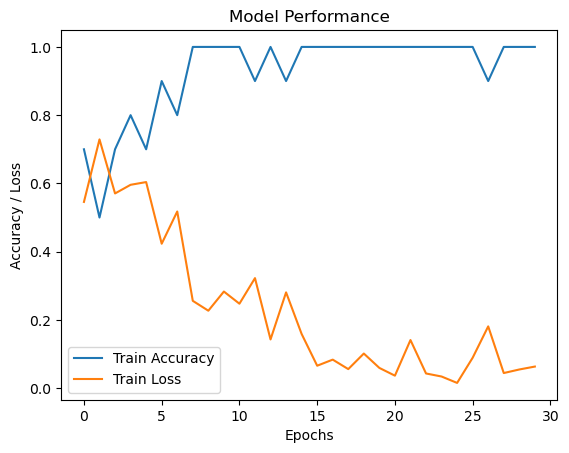

In [27]:
import matplotlib.pyplot as plt

# Assuming you have the training history in 'hist'
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['loss'], label='Train Loss')
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()
